In [198]:
#Import Library
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [199]:
# Memuat dataset
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [200]:
# Melihat informasi awal dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [201]:
# Menampilkan 5 baris pertama
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [202]:
# Menampilkan dimensi dataframe
df.shape

(1338, 7)

In [203]:
# Menampilkan statistik deskriptif
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [204]:
# Menghitung jumlah nilai yang hilang
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [205]:
##Encode data berupa object menjadi numerikal
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in df.columns[1:]:  
    if(df[c].dtype=='object'): #Jika nilai kolom adalah objek, itu akan dikonversi ke numerik
        df[c] = encoder.fit_transform(df[c])
    else: #Mengembalikan nilai kolom tanpa encode
        df[c] = df[c]

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [206]:
#Corelasi Matrix : menampilkan data korelasi antar setiap kolom atau fitur-fitur pada dataset
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

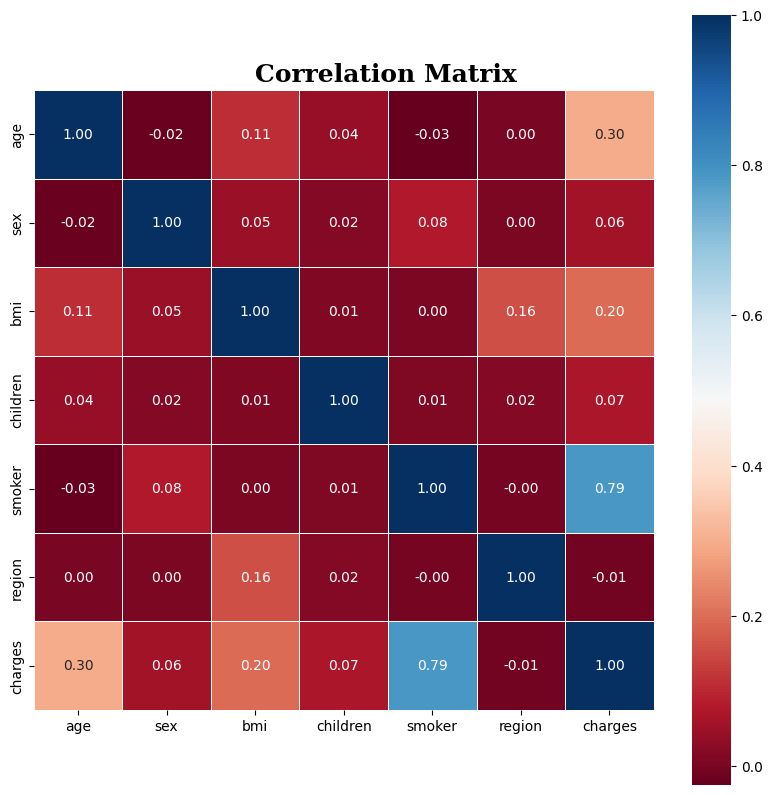

In [207]:
# Membuat dan memvisualisasikan matriks korelasi antar kolom numerik dalam dataset
f, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.text(2.5, -0.1, 'Correlation Matrix', fontsize = 18, fontweight = 'bold', fontfamily = 'serif')
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'RdBu', 
            square = True, linewidth = 0.7, ax = ax)

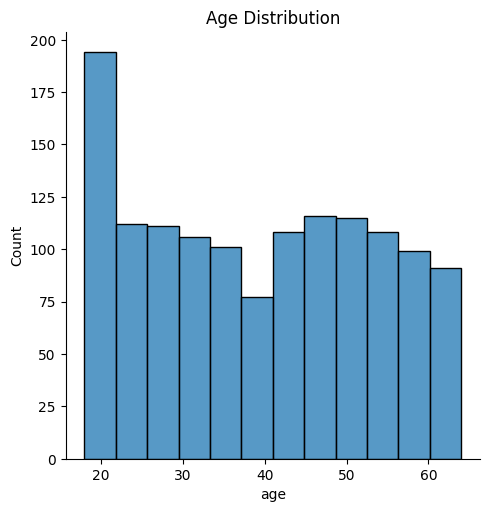

In [208]:
#Distribusi nilai age/umur
plot = sns.displot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

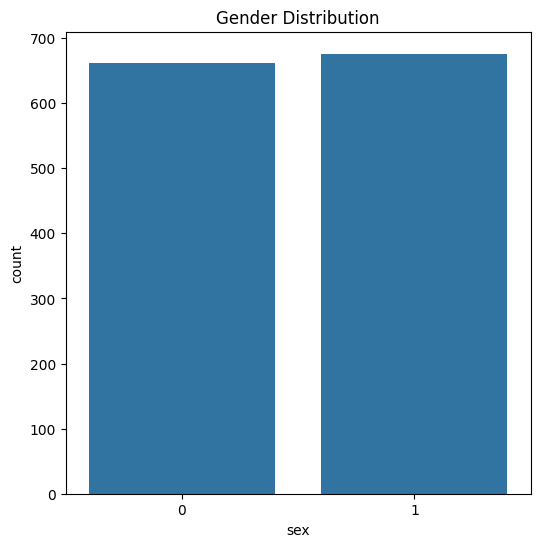

In [209]:
#Distribusi gender, 0 = female dan 1 = male.
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

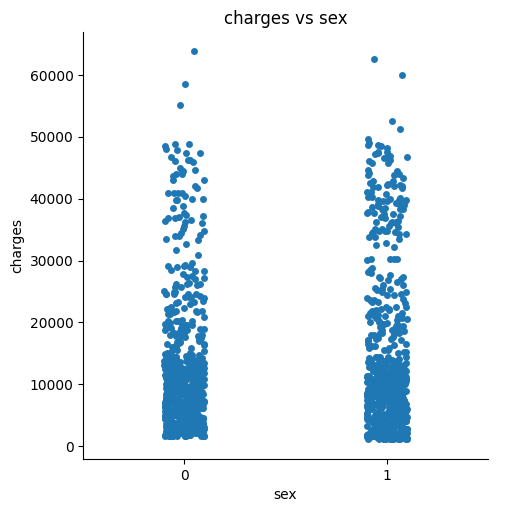

In [210]:
# visualisasi hubungan antara kolom sex dan charges
plot = sns.catplot(data=df, x='sex', y='charges')
plt.title('charges vs sex')
plt.show()

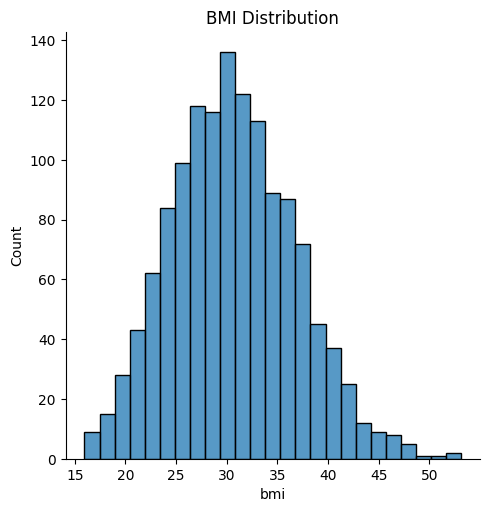

In [211]:
# Distribusi BMI 
plot = sns.displot(data=df, x='bmi')
plt.title('BMI Distribution')
plt.show()

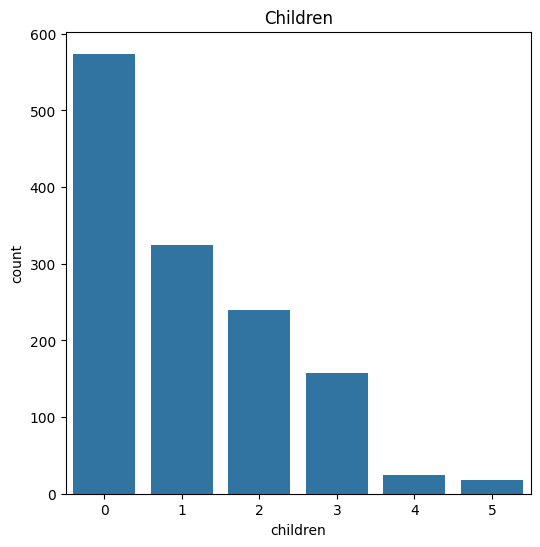

In [212]:
# Distribusi jumlah anak yang dimiliki pasien
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

Text(0.5, 1.0, 'charges vs children')

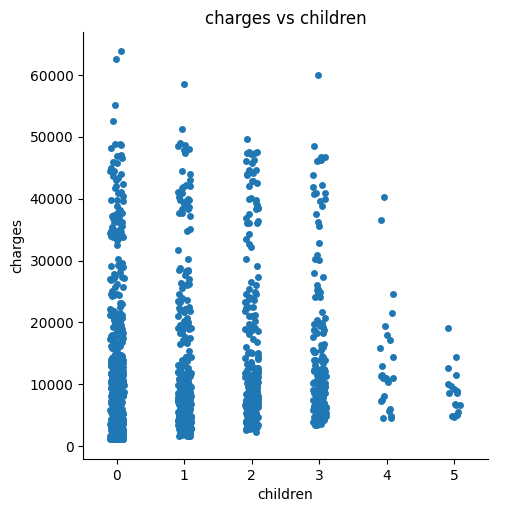

In [213]:
#Visualisasi charges yang dibayar tiap orang jika mempunyai anak.
plot = sns.catplot(data=df, x='children', y='charges')
plt.title('charges vs children')

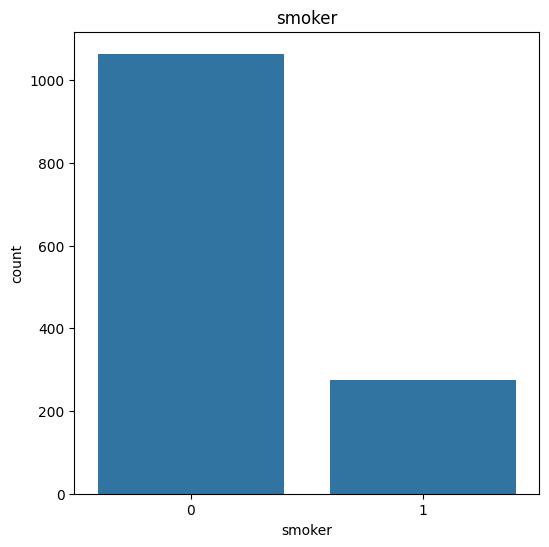

In [214]:
# Distribusi smoker : tidak merokok (0) lebih banyak dibandingkan yang merokok (1).
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

Text(0.5, 1.0, 'charges vs smoker')

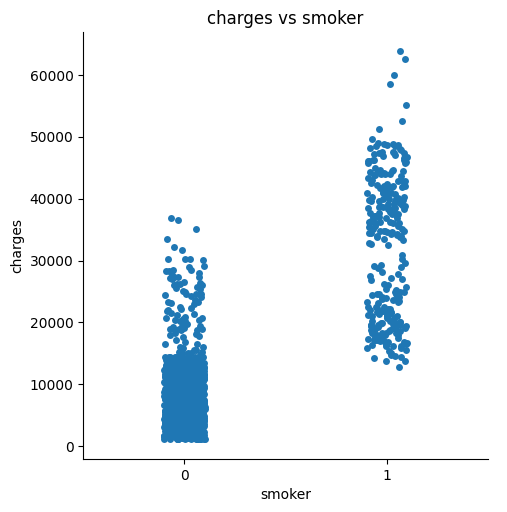

In [215]:
#Memvisualisasikan charge yang dibayar untuk orang yang merupakan non-smoker(0) dan smoker(1). 
#Dimana smoker membayar lebih tinggi daripada non-smoker.

plot = sns.catplot(data=df, x='smoker', y='charges')
plt.title('charges vs smoker')

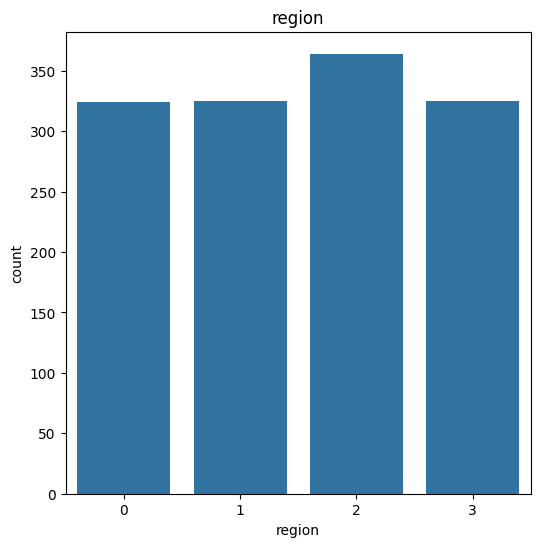

In [216]:
#Distribusi region
#dimana 0 = northeast sebanyak 300an orang
#1 = northwest sebanyak 300an orang
#2 = southeast sebanyak 350an orang, 
#3 = southwest sebanyak 300an orang.

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

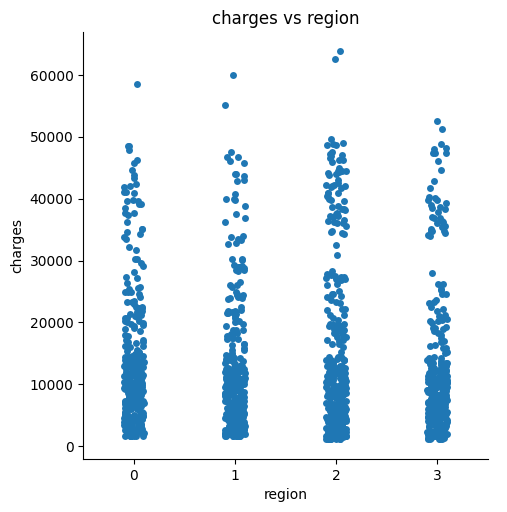

In [217]:
# visualisasi hubungan antara kolom region dan charges
plot = sns.catplot(data=df, x='region', y='charges')
plt.title('charges vs region')
plt.show()

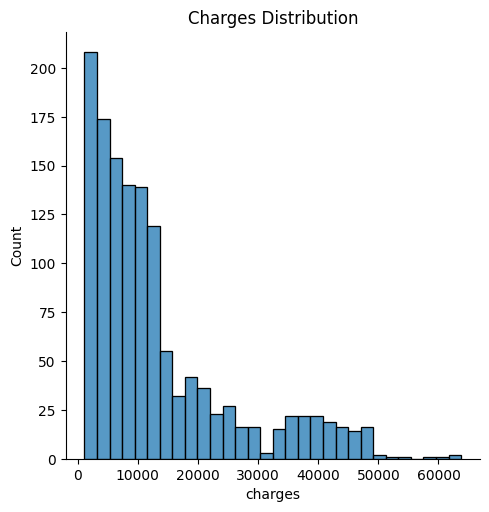

In [218]:
#Distribusi nilai charges
#dimana paling banyak ada di kisaran harga 0 - 10000.
plot = sns.displot(data=df, x='charges')
plt.title('Charges Distribution')
plt.show()

Featur Selection

In [219]:
# Memisahkan Fitur dan Target
X = df.drop(columns='charges', axis=1)
Y = df['charges']

# Menampilkan Dimensi Data
X.shape, Y.shape

((1338, 6), (1338,))

In [220]:
# Menampilkan isi data
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [221]:
# Menampilkan isi data
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [222]:
# Splitting Data menjadi test dan train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=70)

print(X_test.shape, X_train.shape, X_test.shape)

(335, 6) (1003, 6) (335, 6)


In [223]:
# Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)

Model

In [224]:
#Modelling menggunakan Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [225]:
# X_train, y_train model
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
score = cross_val_score(reg, X, Y, cv = 10)

In [226]:
# Melakukan modelling menggunakan linear regression.
print('Nilai koefisien : ', reg.coef_)
print('Nilai intercept : ', reg.intercept_)

Nilai koefisien :  [  249.24796375  -404.32523971   334.90848904   541.26088123
 24190.70263202  -290.20123886]
Nilai intercept :  -11687.481585607604


In [227]:
#Menampilkan nilai koefisien dan nilai intercept.
print('Mean Absolute Error : ', np.round(mean_absolute_error(Y_pred, Y_test), 3))
print('Mean Squared Error : ', np.round(mean_squared_error(Y_pred, Y_test), 3))
print('Root Mean Squared Error : ', np.round(np.sqrt(mean_squared_error(Y_pred, Y_test)), 3))
print('R2 Score : ', np.round(r2_score(Y_pred, Y_test), 3)*100)
print('Mean of cross validaton Score : ',np.round(np.mean(score)*100,3))

Mean Absolute Error :  4376.873
Mean Squared Error :  39869931.205
Root Mean Squared Error :  6314.264
R2 Score :  62.9
Mean of cross validaton Score :  74.48


In [228]:
#Test Akurasi
test_pre = reg.predict(X_test)
test_score = r2_score(Y_test, test_pre)
print("Accuracy Test :",test_score*100)

Accuracy Test : 71.24546781380572


In [229]:
#uji coba akurasi linear regression pada dataset.
pred_df = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred,'Difference':Y_test - Y_pred})
pred_df.head()

,Actual,Predicted,Difference
425,9788.86590,9391.878840,396.987060
607,25678.77845,34840.909977,-9162.131527
428,3167.45585,-280.527222,3447.983072
1142,27117.99378,9018.835089,18099.158691
1121,8347.16430,12659.175819,-4312.011519


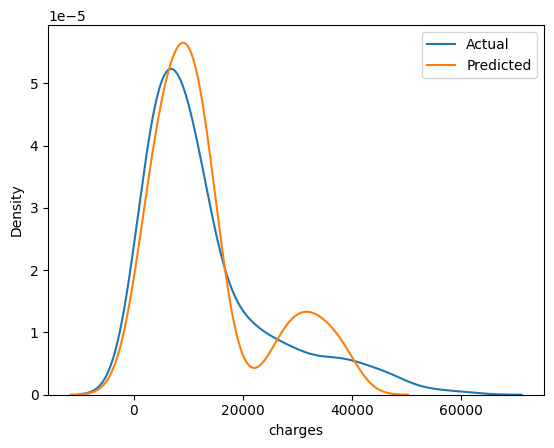

In [230]:
#Visualisasi Linear Regression
sns.distplot(Y_test, hist = False, label = 'Actual')
sns.distplot(Y_pred, hist = False, label = 'Predicted')
plt.legend()

In [231]:
#Prediksi Biaya dengan Input Data
#age,sex,bmi,children,smoker,region
#sex : 0 = female dan 1 = male.
#smoker : tidak merokok (0), merokok (1).
#0 = northeast
#1 = northwest 
#2 = southeast  
#3 = southwest 
input_data = (18,0,33.8,1,0,2)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)

print('Medical charge yang diprediksi : ', prediction[0])

Medical charge yang diprediksi :  4079.7470950380884


In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung metrik evaluasi
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)


Mean Absolute Error (MAE): 4376.8725849722805
Mean Squared Error (MSE): 39869931.204639204
R-squared (R2): 0.7124546781380572


In [233]:
# Menyimpan Model
import pickle

filename = 'prediksi_asuransi.sav'
pickle.dump(reg,open(filename,'wb'))